In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import networkx as nx
from Dist_KL_UCB import Dist_KL_UCB
from KL_UCB import KL_UCB

G = nx.fast_gnp_random_graph(10, 0.5, directed=False,seed=10)
for i in list(G.nodes):
    G.add_edge(i,i)
nx.is_connected(G)

True

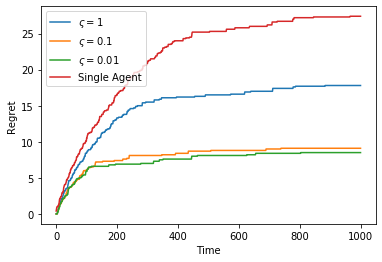

In [2]:
T = 1000
N = 10
rwd_means = [.2, .3, .4, .5, .6]
distributions = [[sps.uniform(loc=rwd_means[i] - .1, scale=0.2) for i in range(len(rwd_means))] for n in range(N)]
sigmas = [1, .1, .01]

for s in sigmas:
    distkl = Dist_KL_UCB(T, distributions, G, sigma=s)
    distkl.run()

    time_axis = list(range(distkl.T))

    plt.plot(time_axis, distkl.regrets[np.argmin(distkl.regrets[:, -1])], label=r"$\varsigma=$" + str(s))
    #plt.plot(time_axis, distkl.regrets[np.argmax(distkl.regrets[:, -1])], label="1")

kl_distributions = [sps.uniform(loc=rwd_means[i] - .1, scale=0.2) for i in range(len(rwd_means))]
kl = KL_UCB(T, kl_distributions)
kl.run()

plt.plot(time_axis, kl.regret, label="Single Agent")
plt.xlabel("Time")
plt.ylabel("Regret")
plt.legend()
plt.show()